#### Imports

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Data

In [99]:
base_dir = "data"
train_dir = os.path.join(base_dir, 'train-cat-rabbit')
test_dir = os.path.join(base_dir, 'test-images')
valid_dir = os.path.join(base_dir, 'val-cat-rabbit')

#### Técnicas de Escalamiento y Preprocesado

In [101]:
train_datagen = ImageDataGenerator(
#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo
				rescale = 1./255, 
				rotation_range = 20, 
				width_shift_range = 0.1, 
    			height_shift_range=0.1,
				zoom_range = 0.15,
				horizontal_flip = True,
				brightness_range=[0.5, 1.2] 
    )

validation_datagen = ImageDataGenerator(1./255)  # Escala los píxeles de las imágenes de validación al rango [0, 1]
test_datagen = ImageDataGenerator(1./255)        # Escala los píxeles de las imágenes de prueba al rango [0, 1]


Found 1400 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

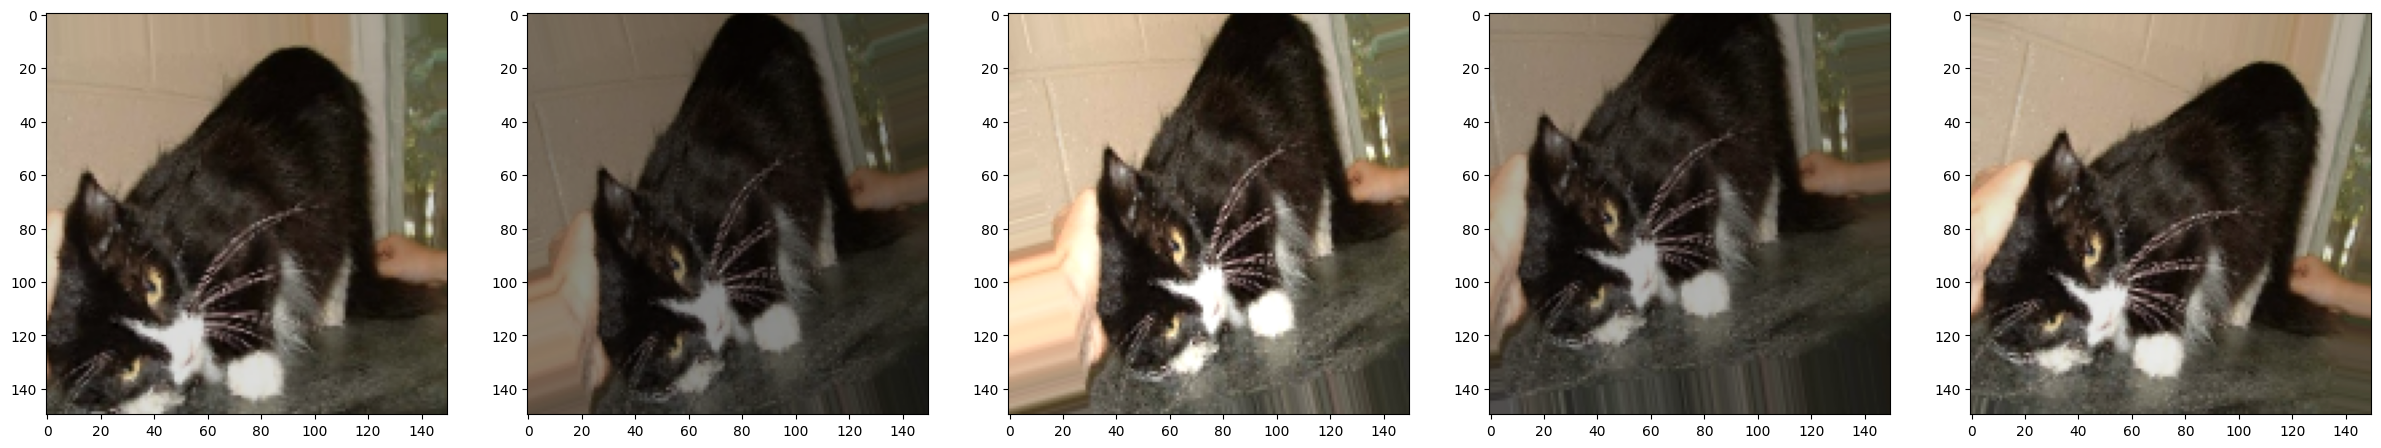

In [107]:
#Medida de las imágenes
images_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = images_size, # Tamaño al que se redimensionan las imágenes
							batch_size = 10,  # Tamaño del lote de imágenes por batch
							class_mode ='binary', # Tipo de etiquetas: 'binary' porque hay dos clases (gato y conejo)
       						shuffle = True 
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  	axarr[i].imshow(train_generator[0][0][0])

(10, 150, 150, 3)
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

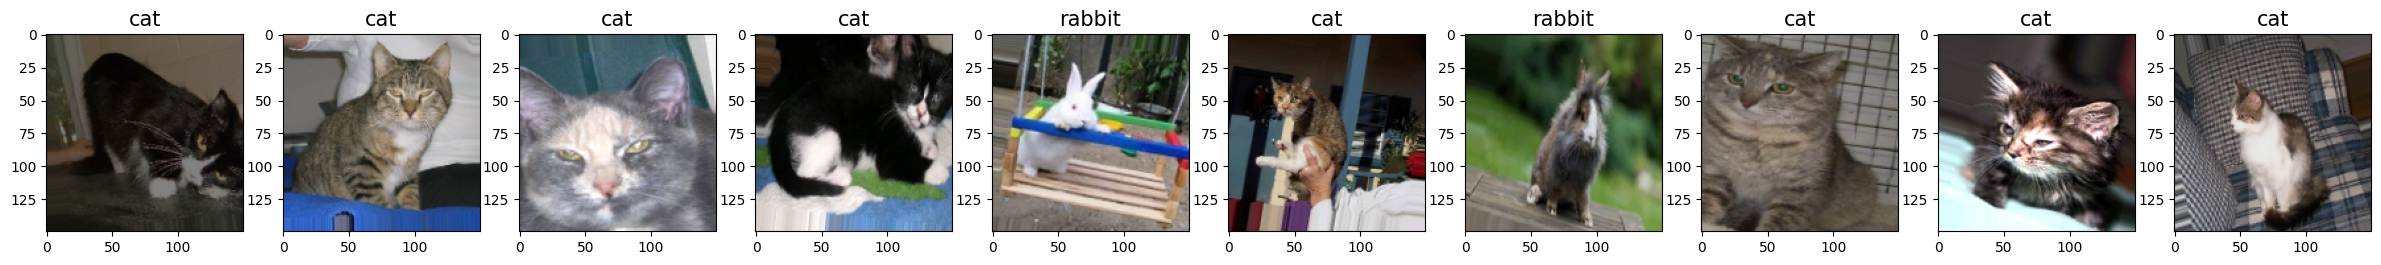

In [109]:
# Visualizar imágenes y las etiquetas despúes de escalamiento y preprocesado
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 7))

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(class_names[int(labels[i])], fontsize=15)
